# Gather

In [4]:
import os
import pandas as pd
import requests
import re
import numpy as np
import json
import tweepy

## import tweet archive csv


In [5]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

## import image predictions tsv



In [6]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename= url.split('/')[-1]
response= requests.get(url)

In [7]:
with open(filename, 'wb') as file:
    file.write(response.content)

In [8]:
df_img = pd.read_csv('image-predictions.tsv', sep='\t')

## import API txt

In [9]:
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [109]:
exp_tweet= api.get_status(df_tweets.tweet_id[1000], tweet_mode='extended')
content= exp_tweet._json


In [11]:
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [12]:
exp_tweet.full_text

'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q'

In [13]:
content['id'],content['retweet_count'], content['favorite_count']

(747963614829678593, 2076, 5621)

In [20]:
# Creating a file for the tweets' text data
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in df_tweets['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

Rate limit reached. Sleeping for: 55


Error on tweet id 754011816964026368;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 680055455951884288;[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 349


In [25]:
dfw = pd.DataFrame()
tweet_list=[]
with open ('tweet_json.txt','r')as file:
    # here you need to read the file line by line
    for line in file:
        tweet=json.loads(line)
        tweet_list.append(tweet)

In [26]:
api_df = pd.DataFrame(tweet_list, columns = ['id','retweet_count','favorite_count'])

In [28]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


# Assess

## assessing tweets archive


In [29]:
df_tweets[df_tweets['tweet_id']==744234799360020481]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None


In [30]:
df_tweets.shape

(2356, 17)

In [31]:
df_tweets.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [32]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [34]:
sum(df_tweets.duplicated())

0

- dog nicknames shouldn't be column names
- retweet and reply columns are irrelevant
- names in some rows are not accurate
- ratings that are less than 10/10
- timestamp should be a date object


## assessing image predictions



In [35]:
sum(df_img['jpg_url'].duplicated())

66

In [36]:
df_img.shape

(2075, 12)

In [37]:
df_img.columns


Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [38]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [40]:
sum(df_img.duplicated())

0

- column names are not descriptive
- there are false and inaccurate predictions
- there are duplicated pictures of dogs

## assesing api txt

# Clean

## cleaning tweets archive


- drop retweet and other irrelevant columns
- change doggo, pupper and floofer into values instead of variables
- names in some rows are not accurate
- ratings that are less than 10/10
- timestamp should be a date object

In [41]:
#create a copy of twitter archive
df_tw = df_tweets.copy()
df_tw.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

In [42]:
#drop incomplete and incorrect names (define)
#code
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_tw.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern, row['text'])[0]
            df_tw.loc[index,'name'] = df_tw.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern, row['text'])[0]
            df_tw.loc[index,'name'] = df_tw.loc[index,'name'].replace('an', c_name)
    except IndexError:
           df_tw.loc[index,'name'] = np.nan

#test          
df_tw.name.value_counts(dropna = False)

None       745
NaN         41
Charlie     12
Oliver      11
Lucy        11
          ... 
Major        1
Clarkus      1
Hero         1
Kirk         1
Laela        1
Name: name, Length: 974, dtype: int64

In [43]:
#change timestamp to datetime type (define)
#code
df_tw['timestamp']= pd.to_datetime(df_tw['timestamp'])

In [44]:
#check timestamp type after change (test)
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2315 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [45]:
#drop nulls (define)
#code
df_tw.dropna(inplace=True)

In [46]:
#(test) for nulls
sum(df_tw['expanded_urls'].isna())

0

In [47]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2256 non-null   int64              
 1   timestamp           2256 non-null   datetime64[ns, UTC]
 2   source              2256 non-null   object             
 3   text                2256 non-null   object             
 4   expanded_urls       2256 non-null   object             
 5   rating_numerator    2256 non-null   int64              
 6   rating_denominator  2256 non-null   int64              
 7   name                2256 non-null   object             
 8   doggo               2256 non-null   object             
 9   floofer             2256 non-null   object             
 10  pupper              2256 non-null   object             
 11  puppo               2256 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [97]:
#change to variables to suitable data types (define)
#code
df_tw['tweet_id']= df_tw['tweet_id'].values.astype(str)
df_tw['rating_denominator']= df_tw['rating_denominator'].values.astype(int)
df_tw['rating_numerator']= df_tw['rating_numerator'].values.astype(int)

#test
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2256 non-null   object             
 1   timestamp           2256 non-null   datetime64[ns, UTC]
 2   source              2256 non-null   object             
 3   text                2256 non-null   object             
 4   expanded_urls       2256 non-null   object             
 5   rating_numerator    2256 non-null   int32              
 6   rating_denominator  2256 non-null   int32              
 7   name                2256 non-null   object             
 8   dog_stage           2256 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(2), object(6)
memory usage: 158.6+ KB


In [49]:
#melt doggo, puppo, floofer columns into row values (define)
#code
df_tw= df_tw.replace('None','')

In [50]:
df_tw['dog_stage']= df_tw['doggo']+  df_tw['floofer']+ df_tw['pupper']+ df_tw['puppo']

In [51]:
df_tw['dog_stage'].value_counts()

                1886
pupper           239
doggo             80
puppo             28
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [52]:
df_tw= df_tw.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [53]:
df_tw.loc[df_tw.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'

In [54]:
df_tw.loc[df_tw.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

In [55]:
df_tw.loc[df_tw.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

In [56]:
df_tw['dog_stage'].value_counts()

                 1886
pupper            239
doggo              80
puppo              28
doggo-pupper       12
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: dog_stage, dtype: int64

In [57]:
#check melting results (test)
df_tw


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...
2344,666071193221509120,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,,
2345,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,10,the,
2346,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,,


## cleaning image predictions

- change column names to more descriptive ones
- drop false prediction
- add strong prediction to master table

In [104]:
#make a copy of image predictions
df_im = df_img.copy()

In [105]:
#remove irrelevant columns (define)
#code
df_im.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [106]:
df_im= df_im.drop(['jpg_url','img_num','p2_conf', 'p3_conf', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)
#test
df_im.head(0)

,tweet_id,p1,p1_conf,p1_dog


In [107]:
#remove false predictions (define)
#code
df_im= df_im.drop(df_im[df_im['p1_dog']== False].index)

In [63]:
#test
df_im['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

In [65]:
#change tweet id from int to object (define)
#code
df_im['tweet_id']= df_im['tweet_id'].values.astype(str)


In [66]:
#test
df_im.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   object 
 1   p1        1532 non-null   object 
 2   p1_conf   1532 non-null   float64
 3   p1_dog    1532 non-null   bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 49.4+ KB


In [108]:
#remove weak predictions (define)
#code
df_im= df_im.drop(df_im[df_im['p1_conf']<0.2].index)

#test
df_im[df_im['p1_conf']<0.2].value_counts()

Series([], dtype: int64)

In [68]:
#change p1 to a meaningful column name
df_im= df_im.rename(columns={'p1': 'dog_breed'}) 

## cleaning API

In [69]:
df_ap= api_df.copy()

#change id from int to str (define)
#code
df_ap['id']= df_ap['id'].values.astype(str)

#test
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


## master data assessment iteration

In [71]:
#merge dog breeds to main
df_merg = pd.merge(df_tw,df_im,on='tweet_id',how='left')

In [72]:
df_merg= df_merg.drop(['p1_conf','p1_dog'],axis=1)

In [73]:
df_merg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2256 non-null   object             
 1   timestamp           2256 non-null   datetime64[ns, UTC]
 2   source              2256 non-null   object             
 3   text                2256 non-null   object             
 4   expanded_urls       2256 non-null   object             
 5   rating_numerator    2256 non-null   int32              
 6   rating_denominator  2256 non-null   int32              
 7   name                2256 non-null   object             
 8   dog_stage           2256 non-null   object             
 9   dog_breed           1417 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(2), object(7)
memory usage: 176.2+ KB


In [74]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [75]:
df_merg[df_merg['rating_denominator']==7][['tweet_id','rating_denominator','expanded_urls','text']]

,tweet_id,rating_denominator,expanded_urls,text
490,810984652412424192,7,"https://www.gofundme.com/sams-smile,https://tw...",Meet Sam. She smiles 24/7 &amp; secretly aspir...


- 740373189193256964 9/11
- 775096608509886464 is a retweet
- 682962037429899265 10/10 not 7/11

In [76]:
df_merg=df_merg.drop(df_merg[df_merg['tweet_id']=='775096608509886464'].index)

In [77]:
df_merg['rating_denominator']= df_merg['rating_denominator'].replace(11,10)

In [78]:
df_merg['rating_denominator'].value_counts()

10     2241
80        2
50        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

In [79]:
df_merg[df_merg['rating_denominator']==7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed
490,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,,golden_retriever


In [80]:
df_merg['rating_denominator']= df_merg['rating_denominator'].replace(7,10)


In [81]:
df_merg['rating_denominator'].value_counts()

10     2242
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

In [82]:
df_merg['rating_denominator'] = df_merg['rating_denominator'].astype(int)
df_merg['dog_nums']= df_merg['rating_denominator'].div(10)

In [83]:
df_merg.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'dog_breed', 'dog_nums'],
      dtype='object')

In [84]:
df_merg['rating_numerator']= df_merg['rating_numerator'].replace('24','11')

In [85]:
df_merg['rating_numerator'].value_counts()


12      543
10      448
11      447
13      338
9       150
8       101
14       49
7        48
5        34
6        31
3        18
4        13
2         8
1         5
0         2
75        2
80        1
24        1
26        1
44        1
50        1
165       1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [86]:
df_master = pd.merge(df_merg,df_ap,left_on='tweet_id',right_on='id',how='left')

In [87]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2255 entries, 0 to 2254
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2255 non-null   object             
 1   timestamp           2255 non-null   datetime64[ns, UTC]
 2   source              2255 non-null   object             
 3   text                2255 non-null   object             
 4   expanded_urls       2255 non-null   object             
 5   rating_numerator    2255 non-null   int32              
 6   rating_denominator  2255 non-null   int32              
 7   name                2255 non-null   object             
 8   dog_stage           2255 non-null   object             
 9   dog_breed           1417 non-null   object             
 10  dog_nums            2255 non-null   float64            
 11  id                  2231 non-null   object             
 12  retweet_count       2231 non-null 

In [88]:
#save master data
df_master.to_csv('twitter_archive_master.csv', index=False)

# Insights

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline

In [90]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2255 entries, 0 to 2254
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2255 non-null   object             
 1   timestamp           2255 non-null   datetime64[ns, UTC]
 2   source              2255 non-null   object             
 3   text                2255 non-null   object             
 4   expanded_urls       2255 non-null   object             
 5   rating_numerator    2255 non-null   int32              
 6   rating_denominator  2255 non-null   int32              
 7   name                2255 non-null   object             
 8   dog_stage           2255 non-null   object             
 9   dog_breed           1417 non-null   object             
 10  dog_nums            2255 non-null   float64            
 11  id                  2231 non-null   object             
 12  retweet_count       2231 non-null 

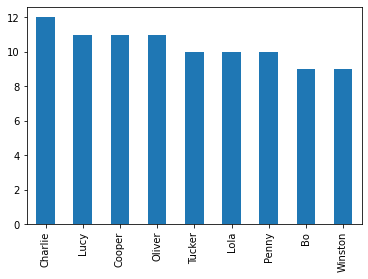

In [91]:
#what are the top 10 popular dog names?
df_merg['name'].value_counts()[1:10].plot(kind='bar');

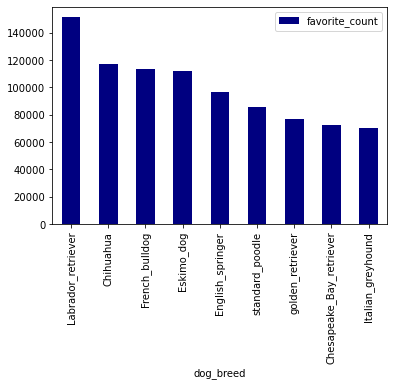

In [92]:
#what are the most favored dogs?
fav= df_master.sort_values('favorite_count',ascending=False)
fav= fav.dropna()
fav.iloc[:9].plot(x='dog_breed',y='favorite_count',kind='bar', color='navy');

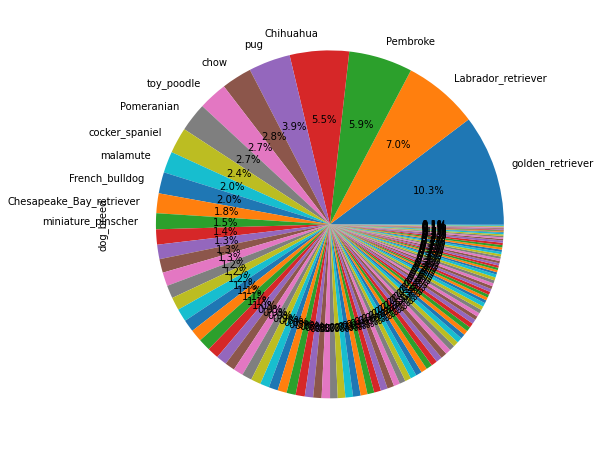

In [96]:
#what are the most popular dog breed?
labels= np.full(len(df_merg.dog_breed.value_counts()),' ',dtype=object)
labels[:13]= ['golden_retriever', 'Labrador_retriever','Pembroke' ,'Chihuahua',  'pug' ,  'chow', 'toy_poodle','Pomeranian','cocker_spaniel','malamute','French_bulldog', 'Chesapeake_Bay_retriever','miniature_pinscher']
df_merg['dog_breed'].value_counts().plot(kind='pie', labels=labels,figsize=(12,8), autopct='%1.1f%%');

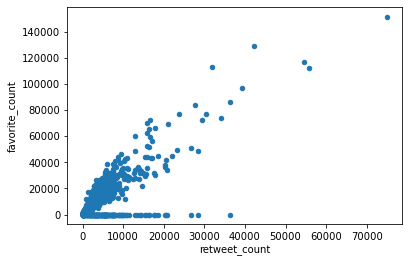

In [95]:
#what is the relation between the retweet count and favorit count?
df_master.plot('retweet_count','favorite_count',kind='scatter');